# Project:Movie Data Analysis


**Introduction

This project is analysing the movie data set where we ask the question does popularity of a movie affect its revenue,in our analysis we want to determine if there is a relationship between popularity and movie. We want to know whether the popularity of a movie affects its revenue whether an increase in popularity will increase or decrease its popularity.
We also ask the question the number of movies that are produced in a year we would want to know the year that many movies were produced.

In [44]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data wrangling

In [45]:
#We are reading the data
df=pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


*Removing outliers


In [25]:
Q1=df.budget.quantile(0.25)
Q3=df.budget.quantile(0.75)
Q1,Q3

(0.0, 15000000.0)

In [29]:
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
                                 
df[(df['budget'] < (Q1-1.5*IQR) / (df['budget'] > (Q3+1.5*IQR)))]
print('shape of dataset(after)',df.shape)

shape of dataset(after) (10866, 21)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [22]:
df.drop(['imdb_id', 'id'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   homepage              2936 non-null   object 
 6   director              10822 non-null  object 
 7   tagline               8042 non-null   object 
 8   keywords              9373 non-null   object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

**Data cleaning

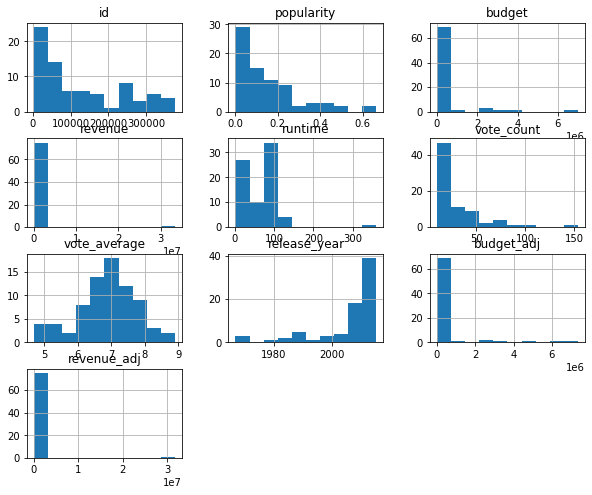

In [24]:
#checking missing values
df[df.cast.isnull()].hist(figsize=(10,8));

findings: id is rightly skewed, popularity is rightly skewed,budget is rightly skewed,revenue is rightly skewed, runtime is rightly skewed, vote count is rightly skewed,vote_average has no skeweness most of the vote_average is at 7,release_year is skewed to the left, budget_adj is skewed to the right  ,revenu_adj e is skewed to the right 

In [33]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<AxesSubplot:>

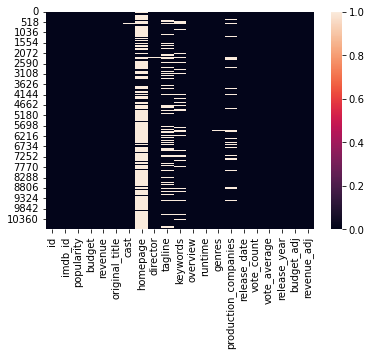

In [35]:
sns.heatmap(df.isnull())

Findings attributes with missing values are cast, homepage,director, tagline, keywords,genre and production companies.

*Dropping all missing values

In [36]:
df.dropna(axis=0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06


In [9]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   homepage              2936 non-null   object 
 6   director              10822 non-null  object 
 7   tagline               8042 non-null   object 
 8   keywords              9373 non-null   object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

C:\Users\JEMY\AppData\Local\Temp\ipykernel_6148\1463998158.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [10]:
df[df.tagline.isnull()]


,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
42,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,http://www.stevejobsthefilm.com,Danny Boyle,NaN,biography|computer|based on true story|father ...,Set backstage at three iconic product launches...,122,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,10/9/15,1035,6.9,2015,2.759999e+07,3.168651e+07
53,2.793297,60000000,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,http://www.foxmovies.com/movies/joy,David O. Russell,NaN,biography,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,12/24/15,1001,6.4,2015,5.519998e+07,9.304329e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.000000e+00
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.102530,0,0,Funeral in Berlin,Michael Caine|Paul Hubschmid|Oskar Homolka|Eva...,NaN,Guy Hamilton,NaN,berlin|berlin wall|england|spy|cold war,"Colonel Stok, a Soviet intelligence officer re...",102,Thriller,Lowndes Productions Limited,12/22/66,13,5.7,1966,0.000000e+00,0.000000e+00
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,NaN,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.000000e+00,0.000000e+00
10859,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,plastic surgery|suspense,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000e+00,0.000000e+00
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00


In [11]:
#dropping data with missing elements
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1992 non-null   float64
 1   budget                1992 non-null   int64  
 2   revenue               1992 non-null   int64  
 3   original_title        1992 non-null   object 
 4   cast                  1992 non-null   object 
 5   homepage              1992 non-null   object 
 6   director              1992 non-null   object 
 7   tagline               1992 non-null   object 
 8   keywords              1992 non-null   object 
 9   overview              1992 non-null   object 
 10  runtime               1992 non-null   int64  
 11  genres                1992 non-null   object 
 12  production_companies  1992 non-null   object 
 13  release_date          1992 non-null   object 
 14  vote_count            1992 non-null   int64  
 15  vote_average        

In [12]:
#Checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10724    False
10759    False
10760    False
10817    False
10819    False
Length: 1992, dtype: bool

Findings:this shows that there are no duplicates.

In [13]:
#data types for our columns
print(df.dtypes)

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


Find unique values of production _companies

In [105]:
 def uniqueValues(production_companies):    
    unVal=set(production_companies)
    for production_company in production_companies:
        unVal.add(production_company[production_companies])
        
        return unVal


In [106]:
 print(df['production_companies'].uniqueValues())


['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'
 'Village Roadshow Pictures|Kennedy Miller Productions'
 'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel'
 ... 'Cherokee Productions|Joel Productions|Douglas & Lewis Productions'
 'Benedict Pictures Corp.' 'Norm-Iris']


* Average revenue of directors

In [41]:
df.groupby('director')['revenue'].mean().sort_values(ascending=False)

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
                                                 ...     
Marina de Van                                0.000000e+00
Mario Bava                                   0.000000e+00
Mario Philip Azzopardi                       0.000000e+00
Ellory Elkayem                               0.000000e+00
Jonas Barnes|Michael Manasseri               0.000000e+00
Name: revenue, Length: 5067, dtype: float64

Findings: Kyle Balda/Pierre Coffin has the highest revenue of 1.156731E+09


**Exploratory Data Analysis


*Research question:Does the popularity of a movie affect its revenue?

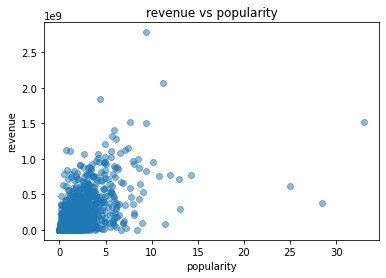

In [21]:
#testing correlation
#scatterplot with popularity vs revenue
plt.scatter(x=df['popularity'], y=df['revenue'], alpha=0.5)
#Title
plt.title('revenue vs popularity')
plt.ylabel('revenue')
plt.xlabel('popularity')
#Generate plot
plt.show()

findings:this shows a strong positive correlation between popularity and revenue with a few outliers.


**Data visualizations.

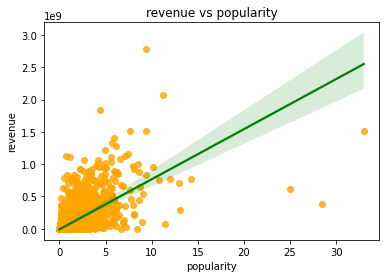

In [7]:
 #plot Budget vs Gross using seaborn

sns.regplot(x='popularity', y='revenue', data=df, scatter_kws={"color":"orange"}, line_kws={"color":"green"})
#Title
plt.title("revenue vs popularity")
#Generate plot
plt.show()

Findings: there is a positive correlation between popularity and revenue as popularity increases revenue increases as shown the green line that keeps on increasing


In [ ]:
*Correlation

In [16]:
#correlation
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.513553,0.641346,0.220787,0.774226,0.298066,0.002262,0.504971,0.600277
budget,0.513553,1.000000,0.747273,0.269480,0.649130,0.118651,0.068611,0.988433,0.630719
revenue,0.641346,0.747273,1.000000,0.257756,0.804788,0.258208,-0.031835,0.752853,0.925494
runtime,0.220787,0.269480,0.257756,1.000000,0.280602,0.243699,-0.078525,0.282257,0.257378
vote_count,0.774226,0.649130,0.804788,0.280602,1.000000,0.379345,0.006364,0.642077,0.741541
vote_average,0.298066,0.118651,0.258208,0.243699,0.379345,1.000000,-0.152250,0.128789,0.274923
release_year,0.002262,0.068611,-0.031835,-0.078525,0.006364,-0.152250,1.000000,-0.027940,-0.237684
budget_adj,0.504971,0.988433,0.752853,0.282257,0.642077,0.128789,-0.027940,1.000000,0.669152
revenue_adj,0.600277,0.630719,0.925494,0.257378,0.741541,0.274923,-0.237684,0.669152,1.000000


findings: popularity has a stong positive correlation of 0.655966 with revenue an increase in popularity of a movie increases it's revenue.
Budget, vote count,budget adjustment also affect the revenue, they have a very strong positive correlation.

*What are the number of movies produced per year?

In [4]:
#checking columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
#number of movies per year
df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

findings: 2014 is the year with the highest number of movie released. 

Plotting a count plot

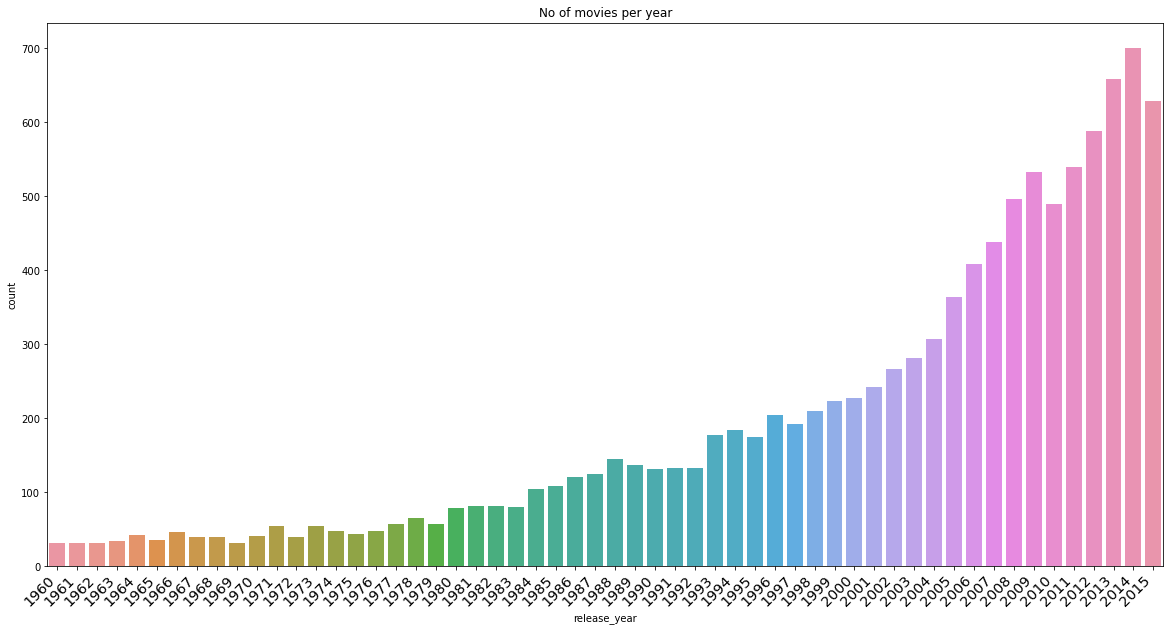

In [109]:
#count plot number of movies vs year
plt.figure(figsize=(20,10))
sns.countplot(x='release_year', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.title("No of movies per year")
plt.show()


findings:as the years go by there is increase in the number of movies released 2014 is the year with the highest number of movies released.

**CONCLUSION PHASE

In [ ]:
*Research questions

Does the popularity of a movie affect its revenue?
In summmary, we can conclude that the popularity of a movie does affect its revenue an increase in popularity leads to an increase in revenue of the movie.

What are the number of movies produced per year?
As the years increase the number of movies released increases.
2014 is the year where many movies were released that is 700 movies.

*Limitation
There are a lot of missing values in the data set this makes it difficult to get accurate results when analysing..
50% of the records have zero as a value.